## Cho dữ liệu glass.data.txt
## Sử dụng thuật toán KNN để dự đoán loại kính dựa trên các thông tin được cung cấp
1. Đọc dữ liệu và gán cho biến data. Tiền xử lý dữ liệu (nếu cần)
2. Tạo inputs data với các cột trừ cột type of class, và outputs data với 1 cột là type of class
3. Từ inputs data và outputs data => Tạo X_train, X_test, y_train, y_test với tỷ lệ 70-30
4. Thực hiện KNN với X_train, y_train
5. Dự đoán y từ X_test => so sánh với y_test
6. Đánh giá mô hình => Nhận xét
7. Ghi mô hình (nếu mô hình tốt sau khi đánh giá)

## Attribute Information:
1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute) -- 1 building_windows_float_processed -- 2 building_windows_non_float_processed -- 3 vehicle_windows_float_processed -- 4 vehicle_windows_non_float_processed (none in this database) -- 5 containers -- 6 tableware - - 7 headlamps

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# import some data to play with
data = pd.read_csv("../../Data/glass.data.txt", sep=",", header=None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       214 non-null    int64  
 1   1       214 non-null    float64
 2   2       214 non-null    float64
 3   3       214 non-null    float64
 4   4       214 non-null    float64
 5   5       214 non-null    float64
 6   6       214 non-null    float64
 7   7       214 non-null    float64
 8   8       214 non-null    float64
 9   9       214 non-null    float64
 10  10      214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [3]:
data.shape

(214, 11)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,10
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [6]:
# thống kê số lượng các lớp
data.groupby(10).count()[0]

10
1    70
2    76
3    17
5    13
6     9
7    29
Name: 0, dtype: int64

In [7]:
# The columns that we will be making predictions with.
inputs = data.iloc[:,1:-1]
inputs.shape

(214, 9)

In [8]:
inputs.head()

,1,2,3,4,5,6,7,8,9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [9]:
# The column that we want to predict.
outputs = data[10]
outputs = np.array(outputs)
outputs.shape

(214,)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.30, random_state=1)

In [11]:
list_k = []
list_acc = []
for K_value in range(2,int(y_train.shape[0]**0.5)):
    list_k.append(K_value)
    neigh = KNeighborsClassifier(n_neighbors = K_value)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    acc = accuracy_score(y_test,y_pred)*100
    list_acc.append(acc)
    print("k = ", K_value,": Accuracy is ", accuracy_score(y_test,y_pred))

k =  2 : Accuracy is  0.7230769230769231
k =  3 : Accuracy is  0.7230769230769231
k =  4 : Accuracy is  0.7384615384615385
k =  5 : Accuracy is  0.7384615384615385
k =  6 : Accuracy is  0.7384615384615385
k =  7 : Accuracy is  0.7384615384615385
k =  8 : Accuracy is  0.6923076923076923
k =  9 : Accuracy is  0.7230769230769231
k =  10 : Accuracy is  0.6923076923076923
k =  11 : Accuracy is  0.7076923076923077


In [12]:
vi_tri = list_acc.index(max(list_acc))
k = list_k[vi_tri]
print("The optimal number of neighbors is", k,"with", list_acc[vi_tri])

The optimal number of neighbors is 4 with 73.84615384615385


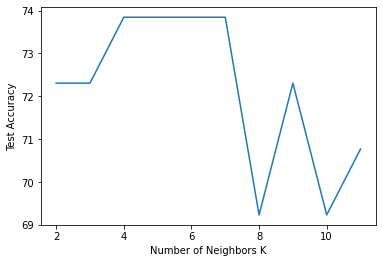

In [13]:
plt.plot(list_k, list_acc)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Test Accuracy')
plt.show()

In [14]:
for i in range(4,8):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print("k=", i, ": The Train prediction accuracy is: ",
    knn.score(X_train,y_train)*100,"%")
    print("------ The Test prediction accuracy is: ",
    knn.score(X_test,y_test)*100,"%")
    #...|...|

k= 4 : The Train prediction accuracy is:  76.51006711409396 %
------ The Test prediction accuracy is:  73.84615384615385 %
k= 5 : The Train prediction accuracy is:  72.48322147651007 %
------ The Test prediction accuracy is:  73.84615384615385 %
k= 6 : The Train prediction accuracy is:  71.14093959731544 %
------ The Test prediction accuracy is:  73.84615384615385 %
k= 7 : The Train prediction accuracy is:  66.44295302013423 %
------ The Test prediction accuracy is:  73.84615384615385 %


In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
# Kiểm tra độ chính xác
print("The Train prediction accuracy is: ",
knn.score(X_train,y_train)*100,"%")
print("The Test prediction accuracy is: ",
knn.score(X_test,y_test)*100,"%")

The Train prediction accuracy is:  72.48322147651007 %
The Test prediction accuracy is:  73.84615384615385 %


In [17]:
y_pred = knn.predict(X_test)
# y_pred

In [18]:
df = pd.DataFrame({'Actual': pd.DataFrame(y_test)[0].values,
                   'Prediction': pd.DataFrame(y_pred)[0].values})
df.head()

,Actual,Prediction
0,2,5
1,7,7
2,2,2
3,2,2
4,1,1


In [19]:
confusion_matrix(y_test, y_pred)

array([[22,  3,  0,  0,  0,  0],
       [ 3, 15,  0,  2,  1,  0],
       [ 6,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 1,  0,  0,  0,  0,  8]], dtype=int64)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.69      0.88      0.77        25
           2       0.79      0.71      0.75        21
           3       0.00      0.00      0.00         7
           5       0.50      1.00      0.67         2
           6       0.50      1.00      0.67         1
           7       1.00      0.89      0.94         9

    accuracy                           0.74        65
   macro avg       0.58      0.75      0.63        65
weighted avg       0.68      0.74      0.70        65



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Quan sát kết quả và đánh giá: Mô hình có độ chính xác chưa cao, còn có class dự đoán
không chính xác do số lượng trong các class còn ít và chưa cân bằng => ??? co cach nao
khac tot hon khong???

In [21]:
# Feature Selection
#get correlations of each features in dataset
data_sub = data.iloc[:,1:]
corrmat = data_sub.corr()
top_corr_features = corrmat.index

In [22]:
data_sub.corr()

,1,2,3,4,5,6,7,8,9,10
1,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
2,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
3,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
4,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
5,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
6,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
7,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
8,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
9,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
10,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


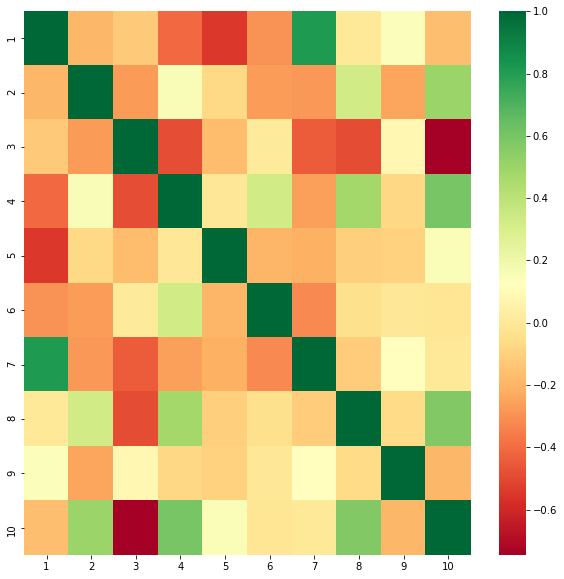

In [23]:
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),cmap="RdYlGn")

In [24]:
from sklearn.feature_selection import SelectKBest, chi2

In [25]:
#apply SelectKBest class to extract all best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(inputs,outputs)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(inputs.columns)

In [26]:
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
print(featureScores.nlargest(9,'Score')) #print 9 best features

   Specs       Score
7      8  145.514077
2      3  100.984212
5      6   31.670632
3      4   16.977488
1      2    4.311253
6      7    3.210929
8      9    2.170185
4      5    0.110449
0      1    0.000048


# 8, 3, 6, 4, 2 have high corr